# Perceptron

El perceptron es uno de los algoritmos mas simples de aprendizaje supervisado para la clasificacion binaria. Fue propuesto en 1958 por Frank Rosenblatt y es la base de las redes neuronales más complejas.
El objetivo del perceptron es encontrar un hiperplano que separe dos clases linealmente separables.

# Modelo Matematico

El modelo matematico del perceptron es el siguiente.
  Dado un conjunto de datos (x_1,x_2,...,x_n) con etiquetas y ∈ { -1,1 } , el perceptrón busca un vector de pesos w y un sesgo b tal que:
f(x) = sign(w * x + b)
Algoritmo de entrenamiento:
- Inicializa w=0, b=0
- Para cada muestra (x_i,y_i):
- Si y_i(w * x + b) < 0, actualiza:
w <- w+ eta y_i x_i <-  b+\eta y_i- Donde eta  es la tasa de aprendizaje





# Codigo python

Promedio:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
dtype: float64
Desviación estándar:
 sepal length (cm)    0.828066
sepal width (cm)     0.435866
dtype: float64
Máximo:
 sepal length (cm)    7.9
sepal width (cm)     4.4
dtype: float64
Mínimo:
 sepal length (cm)    4.3
sepal width (cm)     2.0
dtype: float64


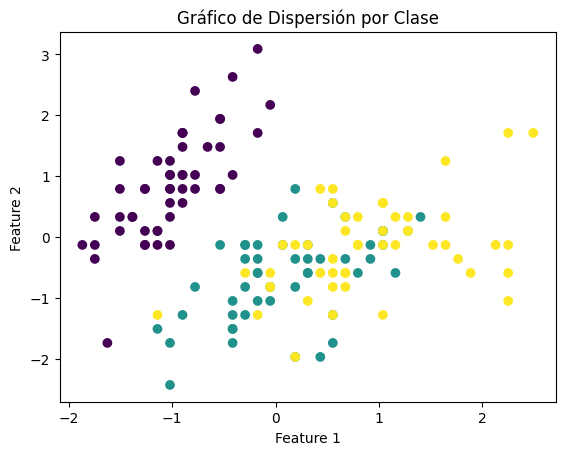

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Cargar dataset
iris = load_iris()
X = iris.data[:, :2]  # Solo dos características para visualización
y = iris.target

# Estadísticas básicas
df = pd.DataFrame(X, columns=iris.feature_names[:2])
print("Promedio:\n", df.mean())
print("Desviación estándar:\n", df.std())
print("Máximo:\n", df.max())
print("Mínimo:\n", df.min())

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Gráfico de dispersión
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis')
plt.title("Gráfico de Dispersión por Clase")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Prediccion

In [2]:
from sklearn.linear_model import Perceptron

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Entrenamiento
clf = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
clf.fit(X_train, y_train)

# Función de predicción
def predict_class(pattern):
    pattern_scaled = scaler.transform([pattern])
    pred = clf.predict(pattern_scaled)
    print(f"Clase predicha: {iris.target_names[pred[0]]}")
    return pred[0]

# Ejemplo
predict_class([5.1, 3.5])

Clase predicha: setosa


np.int64(0)

Evaluacion

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predicciones
y_pred = clf.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {acc:.2f}")

Matriz de Confusión:
 [[19  0  0]
 [ 0  0 13]
 [ 0  0 13]]
Precisión del modelo: 0.71
